# Softmax Activation
추가적인 연산을 하는 함수를 활성화 함수라 한다.

결과값의 합은 1이 된다. 각각의 합을 전체로 나누어준다. 즉 비율.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Error Backpropagation
1. 우리가 보는 신경망 모델은 함수들의 곱이다.
2. 오차 역전파를 통하여 미분없이 미분값을 구할 수 있다.

학습이란 파라미터의 업데이트를 말하고, 학습의 원리는 경사하강법을 사용한다. $w=w-\gamma*dw$

목적: 미분하는 과정없이 미분값을 획득하는 것

오차를 역으로 흘려보낼 수 있다면 미분없이 미분값을 흭득할 수 있다. 

$x -> sig(w*x+b) -> sig(sig(w*x+b)) -> \hat y$

neural Network는 간단한 함수들의 중첩(합성함수)으로 구성

미분의 연쇄법칙 
> 합성 함수의 곱은 함성함수를 구성하는 개별함수 미분의 곱으로 처리

수치미분과정없이 학습을 위한 경사값 계산 
더 많은 히든 레이어와 노드 구성 가능

오차역전파의 개념: 

오차값 X 출력값(1-출력값) X 입력값 = 미분값 의 형태 반복

## Vanishing Gradient
사라지는 미분값, 경사소멸현상 

원인: 역전파로 인한 시그모이드의 중첩으로 점차 0으로 수렴하게 된다. 

해결책: 시그모이드 외에 다른 걸 쓴다. tanh, ReLU,Leaky LeRU

Rectified(정류) Linear Unit

Leaky ReLU: 0이 안나오게 살짝 기울인다.

eLU


# Optimization Method
우리의 모델을 최적화 시키는 방법: 경사하강 
- SDG
- Momentum
- Adaptive Gradient
- Adam

경사하강식을 어떻게 다르게 사용할 것인가?

1. Stochastic Gradient Descent

 전체 데이터 대신 일부의 데이터만을 사용하여 경사하강을 수행한다. 그러나 성능이 그렇게 좋지는 못하다. 

2. Momentum 관성

  이동과정에 관성을 반영한다. 예전에 이동했던 방식에 가중치를 반영하여 움직인다. 

  $w_t = w - \gamma*dw + \mu*dw$ 

3. Adaptive Gradient

- 학습률이 작으면 안정적이지만 학습속도는 느리다. 
- 학습횟수가 증가함에 따라 학습률을 조절하는 옵션추가
- 학습률 감소식 추가
$w = w -\frac{\gamma}{\sqrt g}*\frac{\partial I}{\partial \theta} $
 
4. Adam

  Stochastic 과 Adaptive 와 Mometum 방식의 장점을 합친 알고리즘

5. Root Mean Square Propagation(RMSProp)
 
 Adagrad의 단점인 Gradient 제곱합을 지수평균으로 대체


# TensorFlow

**array는 행렬로 생각해주세요**

Tensor는 문자나 정수를 맞지 않는다. Only 실수 행렬

데이터 흐름 프로그래밍을 위한 오픈소스 

## Tensor

Neural Network 학습의 기본 데이터 단위 
- 임의의 차원 또는 축(Rank)을 가짐


## Keras Modeling

- define : 신경망 구조정의 
- compile: 학습방법설정
- fit: 학습 수행
- evaluate: 평가
- predict: 적용

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


전처리

In [4]:
iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [5]:
iris_ar = iris.values

In [6]:
ar_X =iris_ar[:,0:4].astype(float)
ar_y =iris_ar[:,4]

ar_X.shape ,ar_y.shape

((150, 4), (150,))

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ar_yLBE = encoder.fit_transform(ar_y)

In [8]:
ar_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from tensorflow.keras.utils import to_categorical

ar_yOHE = to_categorical(ar_yLBE)

ar_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [11]:
tensorflow.keras.__version__

'2.5.0'

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ar_X,ar_yOHE,test_size=0.3,random_state = 2045)

keras modeling

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model define

In [14]:
model_iris=models.Sequential()

model_iris.add(layers.Dense(16,activation='relu',input_shape=(4,)))
model_iris.add(layers.Dense(8,activation='relu'))
model_iris.add(layers.Dense(3,activation='softmax'))

In [15]:
model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


model compile

In [16]:
model_iris.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
History_iris = model_iris.fit(X_train,y_train,epochs=500,batch_size=7,validation_data=(X_test,y_test))

Epoch 1/500
15/15 [==============================] - 1s 17ms/step - loss: 1.1163 - accuracy: 0.3143 - val_loss: 1.1278 - val_accuracy: 0.3333
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0810 - accuracy: 0.3429 - val_loss: 1.1031 - val_accuracy: 0.3111
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.3429 - val_loss: 1.0817 - val_accuracy: 0.3111
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0487 - accuracy: 0.3429 - val_loss: 1.0649 - val_accuracy: 0.3111
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0349 - accuracy: 0.3429 - val_loss: 1.0502 - val_accuracy: 0.3111
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0208 - accuracy: 0.3429 - val_loss: 1.0365 - val_accuracy: 0.3111
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0075 - accuracy: 0.3429 - val_loss: 1.0216 - val_accuracy: 0.3111
Epoch 8/500


학습결과 시각화

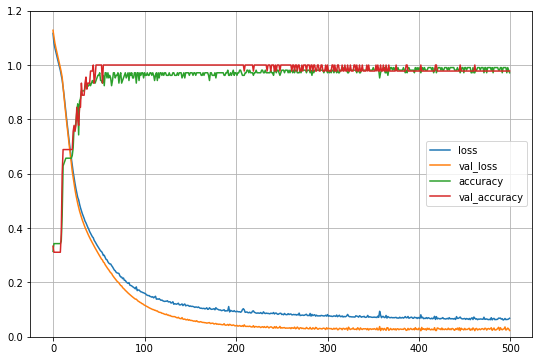

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [19]:
loss,accuracy = model_iris.evaluate(X_test,y_test)

print('Loss = {0:.2f}'.format(loss))
print('Accuracy = {0:.2f}'.format(accuracy))

2/2 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9778
Loss = 0.02
Accuracy = 0.98


In [21]:
import numpy as np
np.set_printoptions(suppress = True,precision = 5)

model_iris.predict(X_test)

array([[0.99999, 0.00001, 0.     ],
       [0.99992, 0.00008, 0.     ],
       [0.00031, 0.99968, 0.00001],
       [0.     , 0.00007, 0.99993],
       [1.     , 0.     , 0.     ],
       [0.00009, 0.99984, 0.00007],
       [0.     , 0.0048 , 0.9952 ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00091, 0.99909],
       [0.99999, 0.00001, 0.     ],
       [0.00011, 0.86636, 0.13353],
       [0.     , 0.00143, 0.99857],
       [0.00008, 0.99343, 0.00649],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.00011, 0.99385, 0.00604],
       [0.00008, 0.97374, 0.02619],
       [1.     , 0.     , 0.     ],
       [0.00004, 0.99923, 0.00073],
       [1.     , 0.     , 0.     ],
       [0.99999, 0.00001, 0.     ],
       [0.99999, 0.00001, 0.     ],
       [0.     , 0.00075, 0.99925],
       [1.     , 0.     , 0.     ],
       [0.     , 0.02819, 0.97181],
       [0.00001, 0.00961, 0.99038],
       [1.     , 0.     , 0.     ],
       [0.00003, 0.99541, 0.

In [23]:
y_hat=model_iris.predict_classes(X_test)

In [27]:
y=np.argmax(y_test,axis=1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y,y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [29]:
print(classification_report(y,y_hat,target_names=['setosa','virginica','versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



model save

In [30]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data


In [31]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 3850167
-rw------- 1 root root   31374019 Aug  4 07:17 Camel.zip
-rw------- 1 root root      20066 Aug  4 07:17 cat.1700.jpg
-rw------- 1 root root   69155672 Aug  4 07:17 creditCardFraud.zip
-rw------- 1 root root   82003032 Aug  4 07:17 DataSet.pkl
-rw------- 1 root root   90618980 Aug  4 07:17 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Aug  4 07:17 Face.zip
-rw------- 1 root root  862182613 Aug  4 07:18 GloVe.zip
-rw------- 1 root root  149574867 Aug  4 07:18 horse-or-human.zip
-rw------- 1 root root 1245927936 Aug  4 07:19 imagenetV2.zip
-rw------- 1 root root    8204887 Aug  4 07:19 Images_500.zip
-rw------- 1 root root   60711700 Aug  4 07:19 IMDB.zip
-rw------- 1 root root    4240457 Aug  4 07:19 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 Aug  4 07:19 ko_w2v.zip
-rw------- 1 root root   12929865 Aug  4 07:19 Logo_Data.zip
-rw------- 1 root root   18272469 Aug  4 07:19 MNIST.csv
-rw------- 1 root root    7903524 Aug  4 07:19 naverRatin

In [33]:
model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [34]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34600 Aug  4 08:37 001_Model_iris.h5


In [35]:
from keras.models import load_model

model_google = load_model('/content/drive/MyDrive/Colab Notebooks/models/001_Model_iris.h5')

In [36]:
model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

현재 폴더에 저장

In [37]:
model_iris.save('Model_iris.h5')

컴퓨터에 저장

In [38]:
from google.colab import files
files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>